# Step 1 : Init

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Step 2 : Have a look

In [ ]:
img_path = "drive/MyDrive/Dataset/train/NORMAL/IM-0115-0001.jpeg"
img = keras.utils.load_img(img_path, target_size=(224,224))

x = keras.utils.img_to_array(img)

print(type(x))
print(x.shape)
plt.imshow(x/255)

# Step 3 : Retrieve data and prepare data

In [ ]:
train_dir = 'drive/MyDrive/Dataset/train'
test_dir = 'drive/MyDrive/Dataset/test'

batch_size = 256
img_size = (224, 224)

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=123
)

test_dataset = keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=123
)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


# Step 4 : Create model

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Input((224,224,3)))

model.add(keras.layers.Rescaling(1./255))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                    

# Step 5 : Train model

In [ ]:
model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30,
    verbose=1
)

# Step 6 : Evaluate model

In [ ]:
score = model.evaluate(test_dataset, verbose=0)

print('Test Loss : ', score[0])
print('Test Accuracy : ', score[1])

# Step 7 : Create Chart

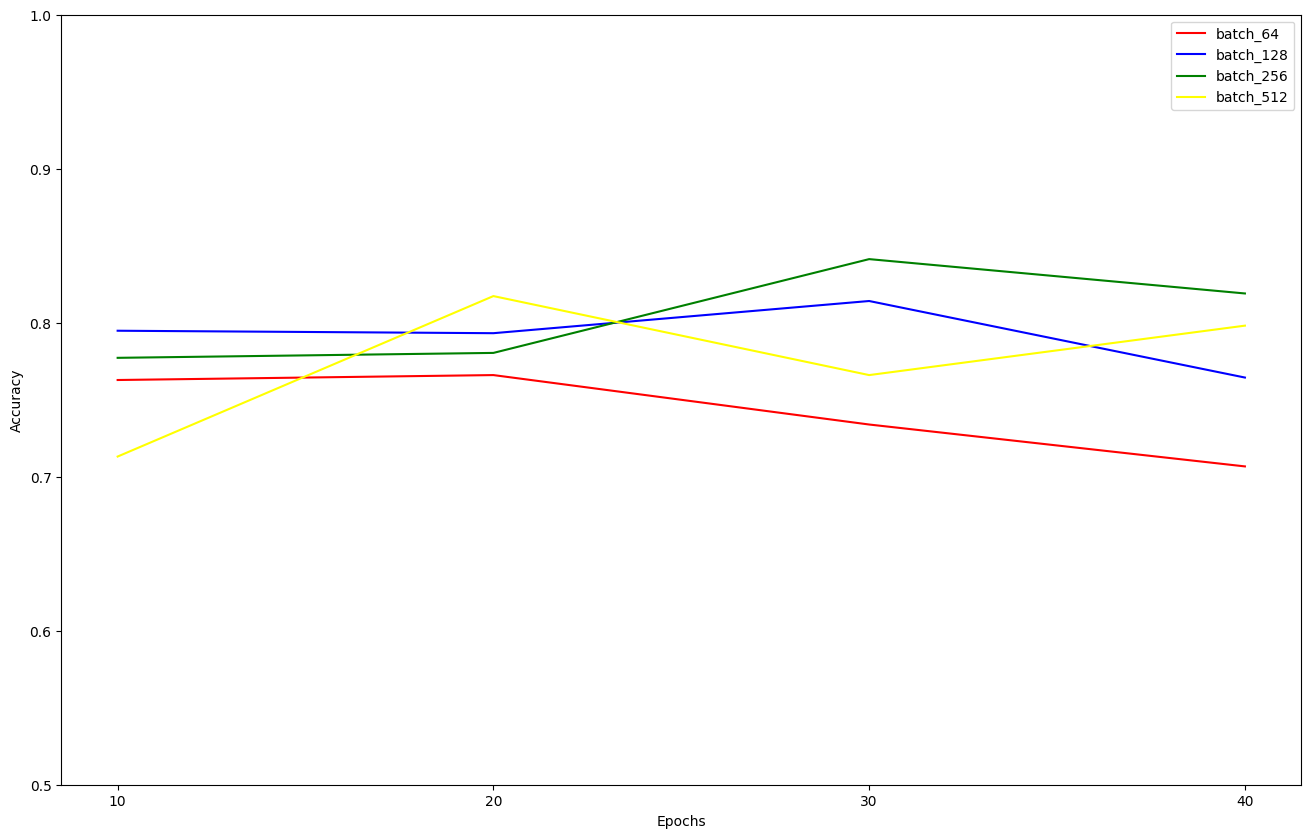

In [ ]:
epochs = [10, 20, 30, 40]
batch64Acc = [0.7628, 0.7660, 0.7339, 0.7067]
batch128Acc = [0.7948, 0.7932, 0.8141, 0.7644]
batch256Acc = [0.7772, 0.7804, 0.8413, 0.8190]
batch512Acc = [0.7131, 0.8173, 0.7660, 0.7981]

plt.figure(figsize=(16,10))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.xticks(epochs)
# plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.ylim(0.5, 1)

plt.plot(epochs, batch64Acc, color='red', label='batch_64')
plt.plot(epochs, batch128Acc, color='blue', label='batch_128')
plt.plot(epochs, batch256Acc, color='green', label='batch_256')
plt.plot(epochs, batch512Acc, color='yellow', label='batch_512')

plt.legend()

# Step 8 : Predict

In [ ]:
img_path = "drive/MyDrive/Dataset/val/NORMAL/IM-0115-0001.jpeg"
img = keras.utils.load_img(img_path, target_size=(224,224))

img = img.reshape((1, 224, 224, 3))
model.predict(img)